In [ ]:
!pip install pdf2image
!sudo apt-get install poppler-utils

In [ ]:
!pip install indic-nlp-library


In [ ]:
# Install Tesseract
!pip install pytesseract
!apt-get install tesseract-ocr

# Download Hindi language data for Tesseract
!apt-get install tesseract-ocr-ind

# Check Tesseract version
!tesseract --version


In [ ]:
import os
import shutil
shutil.move('/content/hin.traineddata', '/usr/share/tesseract-ocr/4.00/tessdata')

# Set the TESSDATA_PREFIX environment variable
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata'

In [ ]:
from pdf2image import convert_from_path
import os
# Replace 'your_input.pdf' with the path to your PDF file
pdf_path = '/content/roll.pdf'

# Create a directory to save cropped images
os.makedirs('pdf', exist_ok=True)

# Convert PDF to images
images = convert_from_path(pdf_path)

# Save each image as a JPG file
for i, image in enumerate(images):
    # Replace 'output_image_{}.jpg' with the desired output file names
    output_filename = f'pdf/output_image_{i}.jpg'
    image.save(output_filename, 'JPEG')


In [ ]:
# #view structure

# import cv2
# import numpy as np

# # Load the image
# image = cv2.imread('/content/pdf/output_image_0.jpg')

# # Convert to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Apply Gaussian blur
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# # Apply edge detection using Canny
# edges = cv2.Canny(blurred, 50, 150)

# # Find contours
# contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Filter and draw table borders
# min_table_area = 1000  # Adjust as needed
# table_image = image.copy()

# for contour in contours:
#     if cv2.contourArea(contour) > min_table_area:
#         cv2.drawContours(table_image, [contour], -1, (0, 255, 0), 2)

# import cv2
# import matplotlib.pyplot as plt

# # Display the image with bounding boxes using matplotlib
# plt.imshow(cv2.cvtColor(table_image, cv2.COLOR_BGR2RGB))
# plt.axis('off')  # Hide axis
# plt.show()



In [ ]:
# import cv2
# import os

# # Load the image
# image = cv2.imread('/content/pdf/output_image_1.jpg')

# # Convert to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Apply Gaussian blur
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# # Apply edge detection using Canny
# edges = cv2.Canny(blurred, 50, 150)

# # Find contours
# contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Create a directory to save cropped images
# output_dir = '/content/crop'
# os.makedirs(output_dir, exist_ok=True)

# # Filter and crop table borders
# min_table_area = 1000  # Adjust as needed

# for i, contour in enumerate(contours):
#     if cv2.contourArea(contour) > min_table_area:
#         x, y, w, h = cv2.boundingRect(contour)
#         cropped_table = image[y:y + h, x:x + w]
#         output_path = os.path.join(output_dir, f'cropped_table_{i}.jpg')
#         cv2.imwrite(output_path, cropped_table)




In [ ]:
import shutil

# Specify the folder path to delete
folder_path = '/content/crop'

# Use shutil.rmtree() to remove the folder and its contents
shutil.rmtree(folder_path)

# Verify that the folder has been deleted
print(f"Folder '{folder_path}' and its contents have been deleted.")


Folder '/content/crop' and its contents have been deleted.


In [ ]:
# import cv2

# # Load the image
# image = cv2.imread('/content/crop/cropped_table_0.jpg')

# # Get the width and height of the image
# height, width, _ = image.shape

# # Calculate the area of the image
# area = width * height

# print(f"Image Area: {area} pixels")


# #Image Area: 2623500 pixels
# #Image Area: 110240 pixels
# #
# print(110240/2)


Image Area: 11340 pixels
55120.0


In [ ]:
import cv2
import os

# Function to detect and crop tables in an image
def detect_and_crop_tables(image_path, output_dir,p,max_table_area=150000, min_table_area=60000):

    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter and crop table borders
    for i, contour in enumerate(contours):
        if cv2.contourArea(contour) > min_table_area and cv2.contourArea(contour) < max_table_area :
            x, y, w, h = cv2.boundingRect(contour)
            cropped_table = image[y:y + h, x:x + w]
            output_path = os.path.join(output_dir, f'cropped_table_{p}.jpg')
            cv2.imwrite(output_path, cropped_table)
            p+=1
    return p

# Directory containing images
input_dir = '/content/pdf'

# Create an output directory to save cropped images
output_dir = '/content/crop'
os.makedirs(output_dir, exist_ok=True)

# Iterate through the images in the input directory and process each one
p=0
for filename in os.listdir(input_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(input_dir, filename)
        p=detect_and_crop_tables(image_path, output_dir,p)

print("Table detection and cropping completed.")


Table detection and cropping completed.


In [ ]:
from PIL import Image

def split(image):
  # Get the original width and height of the image
  width, height = image.size

  # Calculate the width for the 60% and 40% portions
  width_70_percent = int(width * 0.70)
  width_40_percent = int(width * 0.40)

  # Crop the image into a 70% and a 30% portion
  left_portion = image.crop((0, 0, width_70_percent, height))
  right_portion = image.crop((width-width_40_percent, 0, width, height))
  # Save the cropped portions to separate files
  # left_portion.save('left_portion.jpg')  # Save the 60% portion
  # right_portion.save('right_portion.jpg')  # Save the 40% portion

  return left_portion,right_portion

In [ ]:
import pytesseract
from PIL import Image
import re

def extract_serial_number(image):
    try:
        # Perform OCR to extract text from the image
        extracted_text = pytesseract.image_to_string(image)

        pattern_type1 = r'[A-Z]+\d+'  # Matches serial numbers like "RQZ1065002"
        pattern_type2 = r'[A-Z]{2}/\d{2}/\d{3}/\d+'  # Matches serial numbers like "RJ/08/058/000474"

        # Extract serial numbers using the patterns
        serial_numbers_type1 = re.findall(pattern_type1, extracted_text)
        serial_numbers_type2 = re.findall(pattern_type2, extracted_text)

        # Combine the serial numbers from both patterns
        all_serial_numbers = serial_numbers_type1 + serial_numbers_type2


        if all_serial_numbers:
            # If serial numbers are found, return them
            return ' '.join(all_serial_numbers)
        else:
            return None  # Serial number not found in the image

    except Exception as e:
        print(f"Error: {e}")
        return None


In [ ]:

def data_refine(data):
  return data.replace(";", ":")

def mapping(image_path):
  image = Image.open(image_path)
  left_portion, right_portion = split(image)
  # Perform OCR on the image to extract Hindi text
  text = pytesseract.image_to_string(left_portion, lang='hin')
  # Print the extracted Hindi text
  text=data_refine(text)
  print(image_path)
  print(text)
  data_template = {
      "निर्वाचक का नाम": r"निर्वाचक का नाम\s*:\s*(.+)",
      "पति का नाम": r"पति का नाम\s*:\s*(.+)",
      "पिता का नाम": r"पिता का नाम\s*:\s*(.+)",
      "मकान संख्या": r"मकान संख्या\s*:\s*(\d+)",
      "उम्र": r"उम्र\s*:\s*(\d+)",
      "लिंग": r"लिंग\s*:\s*(.+)"
  }

  # Extract data using the template
  extracted_data = {}
  for category, pattern in data_template.items():
      match = re.search(pattern, text)
      if match:
          extracted_data[category] = match.group(1)
      else:
          extracted_data[category] = None

  extracted_data['serial_numbers'] = extract_serial_number(right_portion)

  # Print the extracted data
  #for category, value in extracted_data.items():
  #    print(f"{category}: {value}")
     # Count the number of empty values
  empty_count = len([key for key, value in extracted_data.items() if not value or value == None])

  print(f"Number of empty values: {empty_count}")
  # Check if more than two items are empty
  if empty_count > 1 :
      # Send the image for enhancement
      return image_enhancement(image_path)

  return {
      "निर्वाचक का नाम": extracted_data.get("निर्वाचक का नाम", ""),
      "पति का नाम": extracted_data.get("पति का नाम", ""),
      "पिता का नाम": extracted_data.get("पिता का नाम", ""),
      "मकान संख्या": extracted_data.get("मकान संख्या", ""),
      "उम्र": extracted_data.get("उम्र", ""),
      "लिंग": extracted_data.get("लिंग", ""),
      "serial_numbers": extracted_data.get("serial_numbers", ""),
  }

mapping('/content/crop/cropped_table_134.jpg')

/content/crop/cropped_table_134.jpg
का. का नाम : सरदारी
पति का नाम: छोटेलाल
मकान संख्या : 2

उम्र : 8। लिंग : महिला

 

Number of empty values: 2
predicted-> छल निर्वाचक का नाम : सरदारी
पति का नाम : छोटेलात
मकान संख्या : 2 । उम्र : 8 लिंग : महिला

 



{'निर्वाचक का नाम': 'सरदारी',
 'पति का नाम': 'छोटेलात',
 'पिता का नाम': None,
 'मकान संख्या': '2',
 'उम्र': '8',
 'लिंग': 'महिला',
 'serial_numbers': 'RJ/08/058/000335'}

In [ ]:
from indicnlp.tokenize import indic_tokenize
from difflib import get_close_matches

def correct_text_with_corpus(input_text, threshold=60):
    # Your corpus of correct words
    corpus = ['निर्वाचक', 'का', 'नाम', 'पति', 'पिता', 'मकान', 'संख्या', 'उम्र', 'लिंग']

    # Tokenize the input text
    input_tokens = indic_tokenize.trivial_tokenize(input_text)

    # Function to find the most similar word and its similarity percentage
    def find_most_similar_word(token, corpus):
        matches = get_close_matches(token, corpus, n=1, cutoff=0.6)
        if matches:
            similarity_percentage = round(100 * len(matches[0]) / len(token), 2)
            return matches[0], similarity_percentage
        return None, 0

    # Replace words in the input text with similar words if similarity is above the threshold
    replacement_text = []
    for token in input_tokens:
        similar_word, similarity_percentage = find_most_similar_word(token, corpus)
        if similarity_percentage >= threshold:
            replacement_text.append(similar_word)
        else:
            replacement_text.append(token)

    # Join the corrected tokens to form the corrected text
    corrected_text = ' '.join(replacement_text)

    return corrected_text

# Your Hindi input text
input_text = 'निर्दाचक का माम : सरदारी पति का नाम: छोटेलात मकान संख्या : 2। उप्र : 8 तिंग : महिला'
# Correct the input text using the function
corrected_text = correct_text_with_corpus(input_text)
print(f"Input Text: {input_text}")
print(f"Corrected Text: {corrected_text}")


Input Text: निर्दाचक का माम : सरदारी पति का नाम: छोटेलात मकान संख्या : 2। उप्र : 8 तिंग : महिला
Corrected Text: निर्वाचक का नाम : सरदारी पति का नाम : छोटेलात मकान संख्या : 2 । उम्र : 8 लिंग : महिला


predicted-> छल 27 | निर्वाचक का नाम : घिद्या
पति का नाम : जवाहर
मकान संख्या : 3

उम्र : 79 लिंग : महिला

 



{'निर्वाचक का नाम': 'घिद्या',
 'पति का नाम': 'जवाहर',
 'पिता का नाम': None,
 'मकान संख्या': '3',
 'उम्र': '79',
 'लिंग': 'महिला',
 'serial_numbers': 'RU/08/058/000411'}

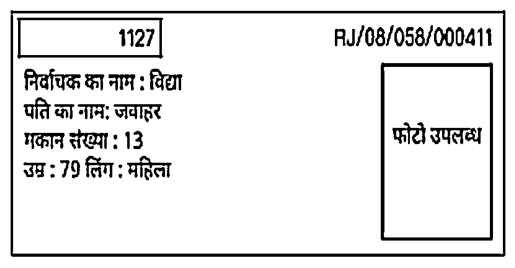

In [ ]:
import cv2
import numpy as np

def enhance_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Resize the image to a desired size (optional)
    # You can adjust the target size as needed
    target_size = (800, 400)
    image = cv2.resize(image, target_size)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise (optional)
    blurred_image = cv2.GaussianBlur(gray_image, (3,3), 0)

    # Perform contrast adjustment (optional)
    # You can adjust the alpha and beta values as needed
    alpha = 1.1  # Controls contrast (1.0 is the original contrast)
    beta = 0 # Controls brightness (0 is no brightness, 100 is full brightness)
    enhanced_image = cv2.convertScaleAbs(blurred_image, alpha=alpha, beta=beta)

    # Binarize the image using adaptive thresholding
    # Adjust blockSize and C values as needed
    binary_image = cv2.adaptiveThreshold(
        enhanced_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2
    )

    # Save the enhanced image for reference (optional)
    enhanced_image_path = "enhanced_image.jpg"
    cv2.imwrite(enhanced_image_path, binary_image)

    return binary_image  # Return the enhanced binary image


def extract_and_correct_data_from_enhanced_image_with_corpus(output_enhanced_image_path):
  enhance_image = Image.open(output_enhanced_image_path)
  left_portion, right_portion = split(enhance_image)
  # Perform OCR on the image to extract Hindi text
  enhance_text = pytesseract.image_to_string(left_portion, lang='hin')
  # Print the extracted Hindi text
  enhance_text_refine=data_refine(enhance_text)

  predicted_text=correct_text_with_corpus(enhance_text_refine)

  print("predicted->",predicted_text)


  data_template = {
      "निर्वाचक का नाम": r"निर्वाचक का नाम\s*:\s*(.+)",
      "पति का नाम": r"पति का नाम\s*:\s*(.+)",
      "पिता का नाम": r"पिता का नाम\s*:\s*(.+)",
      "मकान संख्या": r"मकान संख्या\s*:\s*(\d+)",
      "उम्र": r"उम्र\s*:\s*(\d+)",
      "लिंग": r"लिंग\s*:\s*(.+)"
  }

  # Extract data using the template
  extracted_data = {}
  for category, pattern in data_template.items():
      match = re.search(pattern, predicted_text)
      if match:
          extracted_data[category] = match.group(1)
      else:
          extracted_data[category] = None

  extracted_data['serial_numbers'] = extract_serial_number(right_portion)

  # Print the extracted data
  #for category, value in extracted_data.items():
  #    print(f"{category}: {value}")

  return {
      "निर्वाचक का नाम": extracted_data.get("निर्वाचक का नाम", ""),
      "पति का नाम": extracted_data.get("पति का नाम", ""),
      "पिता का नाम": extracted_data.get("पिता का नाम", ""),
      "मकान संख्या": extracted_data.get("मकान संख्या", ""),
      "उम्र": extracted_data.get("उम्र", ""),
      "लिंग": extracted_data.get("लिंग", ""),
      "serial_numbers": extracted_data.get("serial_numbers", ""),
  }



import cv2
import matplotlib.pyplot as plt


def image_enhancement(image_path):
  enhanced_image = enhance_image(image_path)
  # Save the enhanced image to a file
  output_enhanced_image_path = "enhanced_image.jpg"
  cv2.imwrite(output_enhanced_image_path, enhanced_image)
  plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  return extract_and_correct_data_from_enhanced_image_with_corpus(output_enhanced_image_path)



image_path = '/content/crop/cropped_table_64.jpg'
image_enhancement(image_path)
# #---------------------------------------



# Display the image with bounding boxes using matplotlib
# Hide axis
# plt.show()
# # Now you can use enhanced_image for OCR or further processing


In [ ]:
# # Directory containing images
# input_dir = '/content/crop'

# # Iterate through the images in the input directory and process each one
# for filename in os.listdir(input_dir):
#     if filename.endswith('.jpg') or filename.endswith('.png'):
#         image_path = os.path.join(input_dir, filename)
#         mapping(image_path)
#         print('-'*50)

/content/crop/cropped_table_84.jpg
“की

 

Number of empty values: 7
predicted-> छल का नाम : चमेली
पति का नाम : कदुलचंद
मकान संख्या : 80

उप्र : 7 लिंग : महिता

पिएं

 

/content/crop/cropped_table_127.jpg
झा

निर्वाचक का नाम : संदीप कुमार
पिता का नाम: सज्जन सिंह
मकान संख्या : 27

उम्र : 30 लिंग : पुरुष

 

Number of empty values: 1
/content/crop/cropped_table_134.jpg
का. का नाम : सरदारी
पति का नाम: छोटेलाल
मकान संख्या : 2

उम्र : 8। लिंग : महिला

 

Number of empty values: 2
predicted-> छल निर्वाचक का नाम : सरदारी
पति का नाम : छोटेलात
मकान संख्या : 2 । 
उप : 8 लिंग : महिला

 

/content/crop/cropped_table_146.jpg
झा. का नाम : विकाश कुमार
पिता का नाम: रतीराम
मकान संख्या : १9
उम्र : 28 लिंग : पुरुष

 

Number of empty values: 2
predicted-> छा 65
नि्वविक का नाम : पिता कुमार
पिता का नाम : रतीराम
मकान संख्या : उम्र : 28 लिंग : पुरुष

 

/content/crop/cropped_table_4.jpg
8) मतदाताओं की संख्या :

Number of empty values: 7
predicted-> 
/content/crop/cropped_table_101.jpg
के.
निर्वाचक 

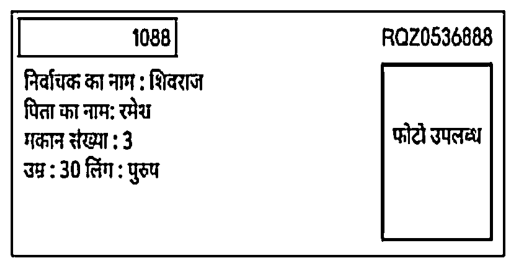

In [ ]:
import pandas as pd

# Directory containing images
input_dir = '/content/crop'

# List to store extracted data
all_extracted_data = []

# Iterate through the images in the input directory and process each one
for filename in os.listdir(input_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(input_dir, filename)
        extracted_data = mapping(image_path)
        # Check if any data was extracted before appending it
        if any(extracted_data.values()):
            all_extracted_data.append(extracted_data)


# Create a DataFrame from the list of extracted data
df = pd.DataFrame(all_extracted_data)

# Define the output Excel file name
output_filename = 'extracted_data.xlsx'

# Save the DataFrame to an Excel file
df.to_excel(output_filename, index=False)


In [ ]:
all_extracted_data

[{'निर्वाचक का नाम': None,
  'पति का नाम': None,
  'पिता का नाम': None,
  'मकान संख्या': '80',
  'उम्र': None,
  'लिंग': 'महिला',
  'serial_numbers': None},
 {'निर्वाचक का नाम': 'संदीप कुमार',
  'पति का नाम': None,
  'पिता का नाम': 'सज्जन सिंह',
  'मकान संख्या': '27',
  'उम्र': '30',
  'लिंग': 'पुरुष',
  'serial_numbers': 'RQZ0816744'},
 {'निर्वाचक का नाम': 'सरदारी',
  'पति का नाम': 'छोटेलाल',
  'पिता का नाम': None,
  'मकान संख्या': None,
  'उम्र': '8',
  'लिंग': 'महिला',
  'serial_numbers': 'RJ/06/058/000335'},
 {'निर्वाचक का नाम': None,
  'पति का नाम': None,
  'पिता का नाम': 'रतीराम',
  'मकान संख्या': None,
  'उम्र': '28',
  'लिंग': None,
  'serial_numbers': 'RQZ0731059'},
 {'निर्वाचक का नाम': 'सुरेन्द्र',
  'पति का नाम': None,
  'पिता का नाम': 'रामकिशन',
  'मकान संख्या': '4',
  'उम्र': '3',
  'लिंग': 'पुरुष',
  'serial_numbers': 'RQZ0431502'},
 {'निर्वाचक का नाम': 'निहालसिंत',
  'पति का नाम': None,
  'पिता का नाम': 'नन्दराम',
  'मकान संख्या': '6',
  'उम्र': None,
  'लिंग': 'पुरुष',


In [ ]:
#49,50,92

In [ ]:
from openpyxl import load_workbook

# Load the Excel workbook
workbook = load_workbook('extracted_data.xlsx')

# Select the active sheet
sheet = workbook.active

# Iterate through the rows and print the data
for row in sheet.iter_rows(values_only=True):
    print(row)

('निर्वाचक का नाम', 'पति का नाम', 'पिता का नाम', 'मकान संख्या', 'उम्र', 'लिंग', 'serial_numbers')
(None, 'कदुलचंद', None, '80', None, 'महिता', None)
('संदीप कुमार', None, 'सज्जन सिंह', '27', '30', 'पुरुष', 'RQZ0816744')
('सरदारी', 'छोटेलात', None, '2', None, 'महिला', 'RJ/08/058/000335')
(None, None, 'रतीराम', None, '28', 'पुरुष', 'RQZ0731059')
('सुरेन्द्र', None, 'रामकिशन', '4', '3', 'पुरुष', 'RQZ0431502')
('निहालसिंह', None, 'नन्द्राम', None, '66', 'पुरुष', 'RQZ1338789')
('ममता', 'दीपक कुमार', None, None, None, 'महिला', 'RQZ1059450')
('अरविन्द', None, 'रोहिताश्व', None, '35', 'पुरुष', 'RQZ0280115')
('राजबाला', 'राजेन्द्र', None, '4', '5', 'महिला.', 'RJ/08/058/000562')
('ओमप्रकाश', None, 'रामपत', '80', '69', 'पुरुष', 'RJ/08/058/000648')
('दीपक कुमार', None, 'रघुवीर सिंट्ठू,', '7', '38', 'पुरुष', 'JXY1551886')
('उमेश', None, 'मुकेश कुमार', '08', '22', 'पुरुष', 'RQZ1132042')
('लाली', None, None, None, '64', 'महिला', 'RJ/08/058/000470')
(None, None, None, '05', None, None, 'ROQZ0867879')
